# Proyecto 2 
## Support Vector Machines (SVM)
github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

In [76]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot

## Cargado de datos

In [77]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [79]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Seleccion de variables para entrenamiento

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Variables eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [80]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

## Creación de variable respuesta

Se busca categorizar los las casas de acuerdo a sus precios en 3 categorías: económicas, intermedias y caras. Así que se creo una variable respuesta `SalePriceCategory` para contener estas categorías.

In [81]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

/tmp/ipykernel_57926/2432582488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
/tmp/ipykernel_57926/2432582488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
/tmp/ipykernel_57926/2432582488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

## Análisis de multicolinealidad

En entregas pasados ya se había analizado la correlación entre las variables del dataset con la variable respuesta de **el precio de las casas.**. Se decidió usar el criterio de ignorar a todas las variables que tuvieran un coeficiente de correlación de Pearson menor a 60% (r < 0.6) ya que representan las características con mayor impacto en el valor final de la propiedad. Con base en este criterio, las variables seleccionadas para entrenar el modelo son:

- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces
- GrLiveArea
- TotalBsmtSF
- GarageArea

In [82]:
features = [
    "OverallQual", 
    "TotalSF", 
    "GarageCars", 
    "FullBath", 
    "YearRemodAdd", 
    "Fireplaces"
]

target = "Categoria_Caro"

Posteriormente se estudio la relación entre las variables seleccionadas, de las cuales algunas terminaron siendo eliminadas por ser redundantes e introducir **multicolinealidad** Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje. El año de construcción tambien fue ignorado a favor del año de remodelación. Al final del proceso se contó con 6 variable con la siguiente matríz de correlación:

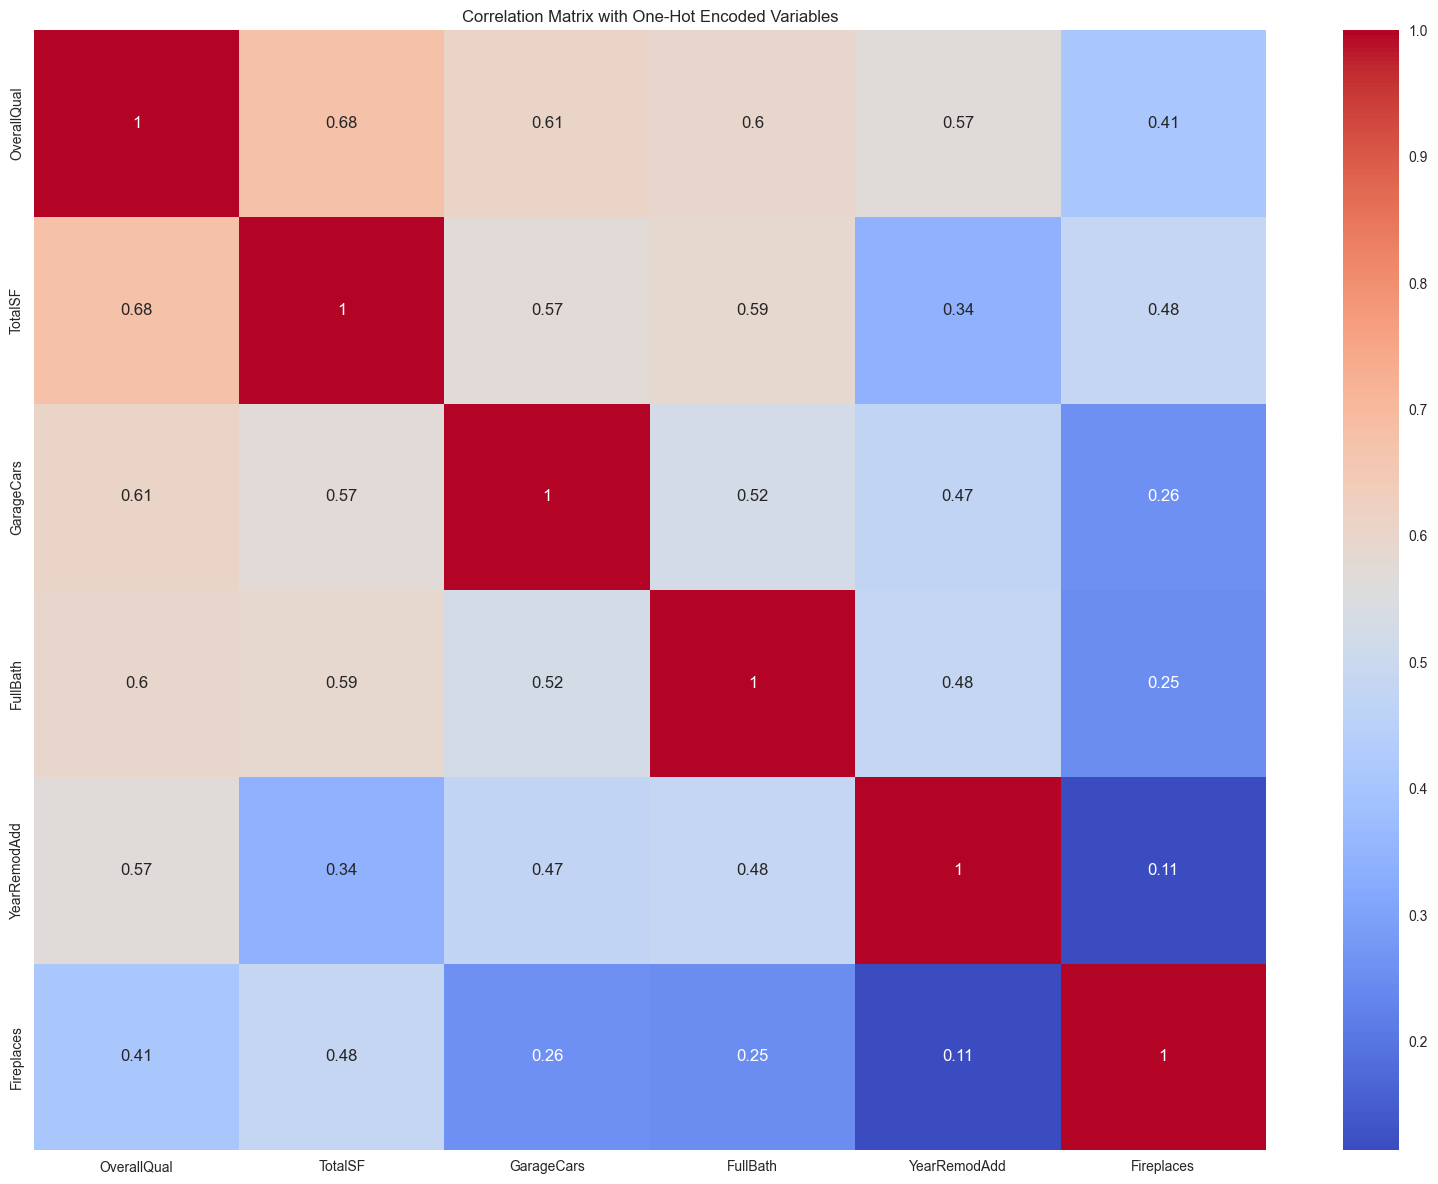

In [83]:
# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)[features]

# Compute correlation matrix on the fully numerical DataFrame
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix with One-Hot Encoded Variables')
plt.tight_layout()
plt.show()

Se puede observar que existe multicolinealidad entre algunas variables que se destinaran para entrener el modelo. Esta multicolinealidad no supera el 70%, se consideró aceptable ya que al estar trabajando con pocas variables se penaliza más la falta de información que la multicolinealidad que pueda excibirse.

### Entrenamiento

Con las variables seleccionadas del conjunto anterior se prepararon los conjuntos de prueba para contener solo las variables deseadas.

In [84]:
X = df_cleaned.drop(["SalePriceCategory", "SalePrice"], axis=1)
y = df_cleaned["SalePriceCategory"]
data_train, data_test,target_train, target_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=0)

# Aplicacion de SVM

## Preprocesamiento

In [85]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Preprocessors
numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("Standar Scaler", numeric_preprocessor, numerical_cols),
        ("Onehot encoder", categorical_preprocessor, categorical_cols),
    ]
)

preprocessors = make_pipeline(preprocessor)
set_config(display='diagram')
preprocessors

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Standar Scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object'))]))])

### Kernel Lineal

#### Entrenamiento

In [98]:
linearSVMPipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="linear"))
])

param_grid = {
    "classifier__C": [0.1, 1, 10, 100, 1000],
    "classifier__gamma": ["scale", 0.01, 0.1, 1, 10, 100],
}

# Set up GridSearchCV
linearSVM = GridSearchCV(linearSVMPipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
linearSVM.fit(data_train, target_train)

# Best parameters
print("Mejores parámetros:", linearSVM.best_params_)


Mejores parámetros: {'classifier__C': 0.1, 'classifier__gamma': 'scale'}


#### Testeo

In [99]:
# Predict on training and test data
y_train_pred = linearSVM.predict(data_train)
y_test_pred = linearSVM.predict(data_test)

# Calculate accuracy
train_accuracy = accuracy_score(target_train, y_train_pred)
test_accuracy = accuracy_score(target_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(target_test, y_test_pred, output_dict=False))

Training Accuracy: 0.9203
Test Accuracy: 0.8207
              precision    recall  f1-score   support

        Caro       0.94      0.80      0.87       116
   Económico       0.85      0.85      0.85       101
  Intermedio       0.71      0.81      0.76       112

    accuracy                           0.82       329
   macro avg       0.83      0.82      0.82       329
weighted avg       0.83      0.82      0.82       329



#### Rendimiento y matriz de confusión

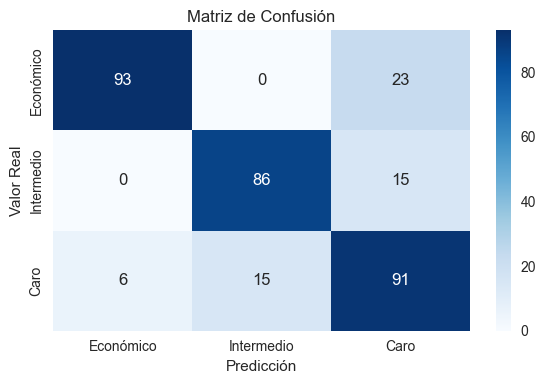

In [100]:
conf_matrix = confusion_matrix(target_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Económico", "Intermedio", "Caro"],
    yticklabels=["Económico", "Intermedio", "Caro"]
)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

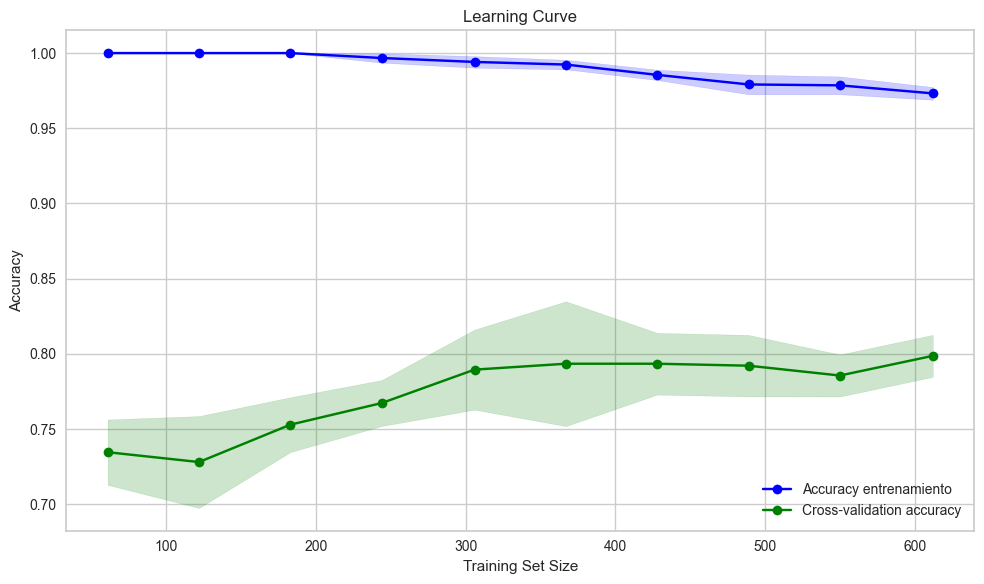

In [89]:
# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=linearSVMPipeline,
    X=data_train,
    y=target_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, "o-", color="green", label="Cross-validation accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### Kernel radial
#### Entrenamiento

In [90]:
# RBF SVM pipeline
rbfSVMPipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf"))
])

# Hyperparameter grid for RBF kernel
param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ["scale", 0.01, 0.1, 1]
}

# Grid search setup
rbfSVM = GridSearchCV(rbfSVMPipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rbfSVM.fit(data_train, target_train)

# Output best parameters
print("Mejores parámetros:", rbfSVM.best_params_)

Mejores parámetros: {'classifier__C': 1, 'classifier__gamma': 'scale'}


#### Testeo

In [91]:
# Predict on training and test data
y_train_pred = rbfSVM.predict(data_train)
y_test_pred = rbfSVM.predict(data_test)

# Calculate accuracy
train_accuracy = accuracy_score(target_train, y_train_pred)
test_accuracy = accuracy_score(target_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(target_test, y_test_pred, output_dict=False))

Training Accuracy: 0.9359
Test Accuracy: 0.8146
              precision    recall  f1-score   support

        Caro       0.91      0.79      0.85       116
   Económico       0.84      0.89      0.87       101
  Intermedio       0.71      0.77      0.74       112

    accuracy                           0.81       329
   macro avg       0.82      0.82      0.82       329
weighted avg       0.82      0.81      0.82       329



#### Rendimiento y matriz de confusión

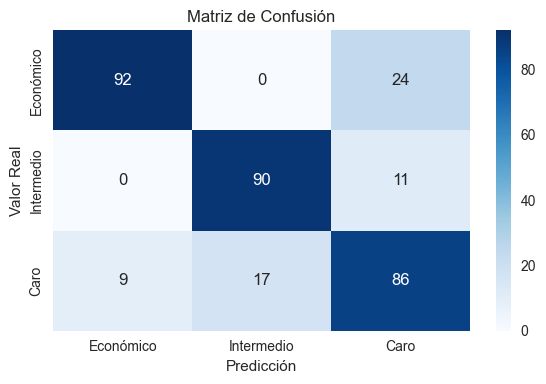

In [92]:
conf_matrix = confusion_matrix(target_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Económico", "Intermedio", "Caro"],
    yticklabels=["Económico", "Intermedio", "Caro"]
)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

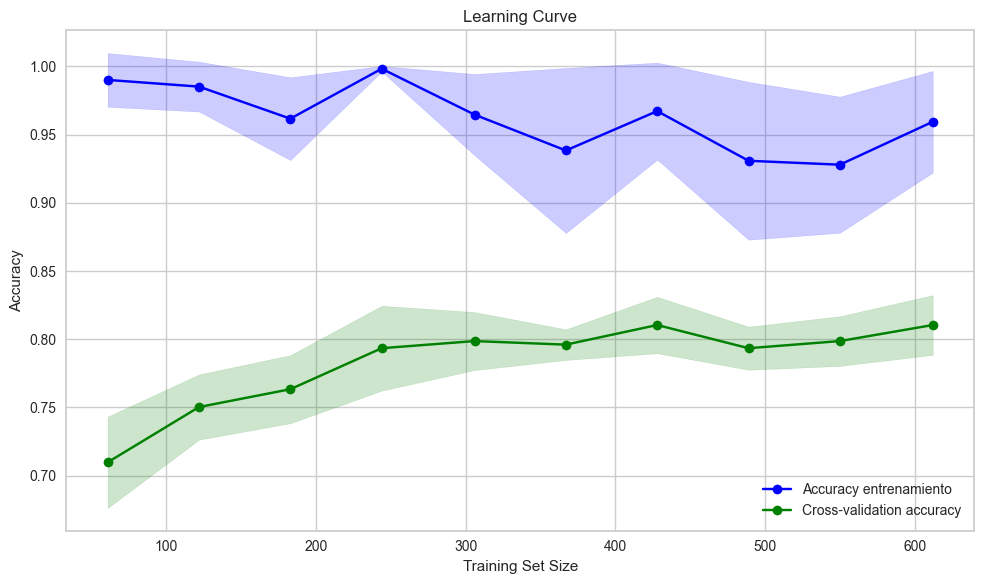

In [93]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rbfSVM,
    X=data_train,
    y=target_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, "o-", color="green", label="Cross-validation accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### Kernel polinomial
#### Entrenamiento

In [94]:
polySVMPipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="poly"))
])

param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__gamma": ["scale", 0.01, 0.1],
    "classifier__degree": [2, 3, 4]
}

polySVM = GridSearchCV(polySVMPipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
polySVM.fit(data_train, target_train)

# Output best parameters
print("Mejores parámetros:", polySVM.best_params_)

Mejores parámetros: {'classifier__C': 10, 'classifier__degree': 3, 'classifier__gamma': 'scale'}


#### Testeo

In [95]:
y_train_pred = polySVM.predict(data_train)
y_test_pred = polySVM.predict(data_test)

train_accuracy = accuracy_score(target_train, y_train_pred)
test_accuracy = accuracy_score(target_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(classification_report(target_test, y_test_pred, output_dict=False))

Training Accuracy: 0.9961
Test Accuracy: 0.7812
              precision    recall  f1-score   support

        Caro       0.87      0.84      0.85       116
   Económico       0.82      0.79      0.81       101
  Intermedio       0.67      0.71      0.69       112

    accuracy                           0.78       329
   macro avg       0.79      0.78      0.78       329
weighted avg       0.79      0.78      0.78       329



#### Rendimiento y matriz de confusión

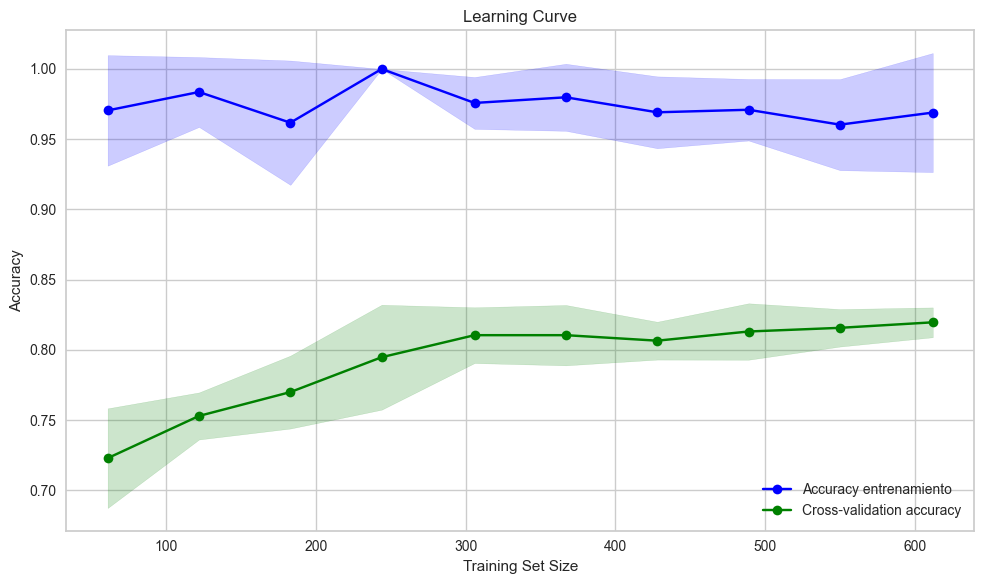

In [96]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=polySVM,
    X=data_train,
    y=target_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, "o-", color="green", label="Cross-validation accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

Con base en los resultados obtenidos del SVM con diferentes kernels, se puede observar que el modelo más equilibrado es el que utiliza el kernel lineal, con una precisión del 92.03% en entrenamiento y 82.07% en prueba. Lo cual indica que puede predecir bastante bien nuevos grupos de datos.  El segundo mejor modelo es el de kernel radial (RBF), con una precisión de 93.59% en entrenamiento y 81.46% en prueba, lo que refleja un desempeño sólido, aunque con una mayor diferencia entre entrenamiento y prueba. Por el trol lado, el modelo con kernel polinomial evidencia un sobreajuste considerable, ya que alcanza una precisión de 99.61% en el conjunto de entrenamiento, pero cae a 78.12% en el conjunto de prueba. Aunque este valor de prueba no es bajo en términos absolutos, la gran diferencia con respecto al entrenamiento indica que el modelo está memorizando los datos en lugar de aprender patrones generalizables.

 A pesar de que se aplicó validación cruzada con GridSearchCV para optimizar los hiperparámetros, aún se pueden implementar otras estrategias para reducir el sobreajuste, como aplicar técnicas de reducción de dimensionalidad como PCA, realizar una selección más precisa de características relevantes, normalizar adecuadamente los datos, y, si es posible, aumentar la cantidad de datos de entrenamiento para mejorar la capacidad del modelo de generalizar sobre casos nuevos. Estas medidas pueden contribuir significativamente a mejorar el rendimiento.

# Discusión

# Conclusiones